In [42]:
import mlx.core as mx
import mlx.nn as nn
import mlx.utils as util

import numpy as np

import matplotlib.pyplot as plt

In [3]:
from util import norm_logpdf, normal_like

In [47]:
x = mx.array([1., 2., 3.])
loc = mx.array([1.4, 2.2, 2.9])
scale = mx.array([1., 1., 1.])



norm_logpdf(x, loc, scale).sum()

array(-2.86182, dtype=float32)

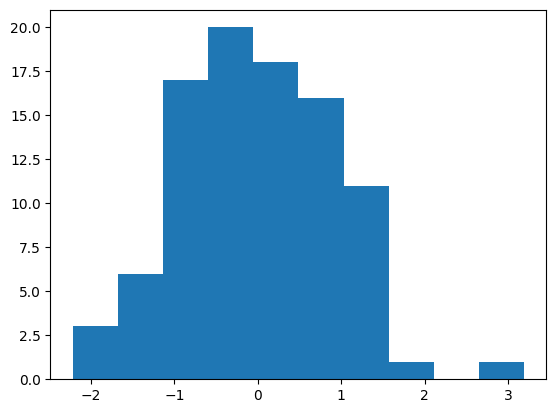

In [46]:
def test_normal_like():
    class MLP(nn.Module):
        def __init__(
            self, num_layers: int, input_dim: int, hidden_dim: int, output_dim: int
        ):
            super().__init__()
            layer_sizes = [input_dim] + [hidden_dim] * num_layers + [output_dim]
            self.layers = [
                nn.Linear(idim, odim)
                for idim, odim in zip(layer_sizes[:-1], layer_sizes[1:])
            ]

        def __call__(self, x):
            for l in self.layers[:-1]:
                x = mx.maximum(l(x), 0.0)
            return self.layers[-1](x)


    params = MLP(5, 1, 4, 1).parameters()
    flat_normal = util.tree_flatten(normal_like(params))

    samples = mx.array([]).reshape(-1, 1)
    for k,v in flat_normal:
        v = v.reshape(-1, 1)
        samples = mx.concatenate([samples, v])


    samples = mx.array(samples).reshape(-1, 1)
    samples = np.array(samples).squeeze()
    plt.hist(samples, bins=10)

test_normal_like()